In [58]:
# Membaca Data dan Import pandas

import pandas as pd

df = pd.read_csv("matrik.csv", sep=";")
df.head()

,NPM,NAMA,ADIL DAN AMANAH,SUKA MEMBANTU,NYAMBUNG KALAU NGOBROL,ASYIK DAN MENARIK
0,24083010001,MADINA HEDY ALIFANTI,"0,70","0,80","0,70","0,70"
1,24083010003,MARIA DWI KURNIASIH,"0,50","0,60","0,70","0,70"
2,24083010005,ADINDA PUTRI RACHMAWATI,"0,60","0,50","0,40","0,50"
3,24083010006,AQUINA SYABITA,"0,60","0,60","0,50","0,70"
4,24083010007,VARID PUTRA PRATAMA,"0,50","0,40","0,50","0,50"


In [66]:
# Membersihkan semua kolom angka: ganti koma (,) jadi titik (.)
for col in ["ADIL DAN AMANAH", "SUKA MEMBANTU", "NYAMBUNG KALAU NGOBROL", "ASYIK DAN MENARIK"]:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)
df.head()

,NPM,NAMA,ADIL DAN AMANAH,SUKA MEMBANTU,NYAMBUNG KALAU NGOBROL,ASYIK DAN MENARIK,Skor Akhir
0,24083010001,MADINA HEDY ALIFANTI,0.7,0.8,0.7,0.7,0.72
1,24083010003,MARIA DWI KURNIASIH,0.5,0.6,0.7,0.7,0.62
2,24083010005,ADINDA PUTRI RACHMAWATI,0.6,0.5,0.4,0.5,0.49
3,24083010006,AQUINA SYABITA,0.6,0.6,0.5,0.7,0.57
4,24083010007,VARID PUTRA PRATAMA,0.5,0.4,0.5,0.5,0.48


Langkah ini membersihkan kolom angka agar siap dianalisis. Nilai dari csv yang menggunakan koma sebagai pemisah desimal diubah menjadi titik, kemudian dikonversi ke tipe float. Hal ini memastikan data sudah benar dan dapat digunakan untuk perhitungan numerik selanjutnya.

In [72]:
# 3. Membentuk matriks C dari kolom-kolom penilaian
C = df[["ADIL DAN AMANAH", "SUKA MEMBANTU", "NYAMBUNG KALAU NGOBROL", "ASYIK DAN MENARIK"]].to_numpy(dtype=float)

Setelah itu, kolom-kolom yang berisi skor penilaian mahasiswa, yaitu "ADIL DAN AMANAH", "SUKA MEMBANTU", "NYAMBUNG KALAU NGOBROL", dan "ASYIK DAN MENARIK", diekstraksi untuk membentuk matriks C. Matriks C ini disimpan dalam bentuk numpy array bertipe float dan merepresentasikan nilai setiap mahasiswa pada masing-masing aspek penilaian.

In [73]:
# Tahap penentuan bobot prioritas (P)
P = np.array([0.3, 0.2, 0.4, 0.1], dtype=float)

Tahap berikutnya adalah menentukan bobot prioritas untuk masing-masing aspek penilaian. Bobot ini disusun dalam bentuk array float, di mana masing-masing nilai menunjukkan tingkat kepentingan relatif dari aspek tersebut dalam perhitungan skor akhir.

In [75]:
# Perhitungan skor akhir
skor = C @ P
df["Skor Akhir"] = skor

print(df.head())


           NPM                     NAMA  ADIL DAN AMANAH  SUKA MEMBANTU  \
0  24083010001     MADINA HEDY ALIFANTI              0.7            0.8   
1  24083010003      MARIA DWI KURNIASIH              0.5            0.6   
2  24083010005  ADINDA PUTRI RACHMAWATI              0.6            0.5   
3  24083010006           AQUINA SYABITA              0.6            0.6   
4  24083010007      VARID PUTRA PRATAMA              0.5            0.4   

   NYAMBUNG KALAU NGOBROL  ASYIK DAN MENARIK  Skor Akhir  
0                     0.7                0.7        0.72  
1                     0.7                0.7        0.62  
2                     0.4                0.5        0.49  
3                     0.5                0.7        0.57  
4                     0.5                0.5        0.48  


Skor akhir setiap mahasiswa dihitung dengan mengalikan matriks C yang memuat semua skor penilaian dengan bobot prioritas P. Hasil perkalian ini menghasilkan nilai komposit yang mencerminkan penilaian keseluruhan setiap mahasiswa berdasarkan bobot masing-masing aspek. Nilai skor akhir ini kemudian ditambahkan sebagai kolom baru pada dataframe.

Berdasarkan output yang ditampilkan, misalnya mahasiswa pertama, Madina Hedy Alifanti, memiliki skor akhir 0,72. Hal ini menunjukkan bahwa secara keseluruhan, dia mendapatkan nilai tinggi ketika semua aspek penilaian dikombinasikan dengan bobot masing-masing. Mahasiswa kedua, Maria Dwi Kurniasih, memiliki skor akhir 0,62, sedangkan mahasiswa ketiga, Adinda Putri Rachmawati, memiliki skor lebih rendah yaitu 0,49. Skor akhir ini memudahkan untuk membandingkan performa keseluruhan setiap mahasiswa secara cepat, karena semua aspek telah digabungkan menjadi satu angka representatif.

In [76]:
# Menghitung matriks kovarian dan matriks koelasi

cov_mat = np.cov(X_matrix, rowvar=False, ddof=1)
corr_mat = np.corrcoef(X_matrix, rowvar=False)
print("\nMatriks kovarian:\n", cov_mat)
print("\nMatriks korelasi:\n", corr_mat)


Matriks kovarian:
 [[0.02327564 0.01507051 0.01780128 0.01103846]
 [0.01507051 0.02276282 0.01754487 0.01180769]
 [0.01780128 0.01754487 0.02358333 0.01008974]
 [0.01103846 0.01180769 0.01008974 0.01105128]]

Matriks korelasi:
 [[1.         0.65473291 0.7597975  0.6882582 ]
 [0.65473291 1.         0.75724178 0.74446736]
 [0.7597975  0.75724178 1.         0.62498732]
 [0.6882582  0.74446736 0.62498732 1.        ]]


Kode di atas digunakan untuk menghitung matriks kovarian dan korelasi antar-aspek penilaian mahasiswa. Matriks kovarian menunjukkan seberapa besar perubahan satu aspek berkaitan dengan aspek lainnya, sedangkan matriks korelasi menstandarkan nilai tersebut agar berada di antara -1 sampai 1 sehingga mudah dibandingkan.

Berdasarkan output, matriks kovarian semua nilainya positif, yang berarti setiap aspek cenderung meningkat bersama-sama, meskipun perubahannya relatif kecil. Matriks korelasi menunjukkan hubungan antar-aspek cukup kuat; misalnya "NYAMBUNG KALAU NGOBROL" dan "ADIL DAN AMANAH" memiliki korelasi 0,76, menandakan hubungan positif yang kuat. Korelasi antara aspek lainnya juga cukup tinggi, berkisar antara 0,62 sampai 0,76, sementara semua nilai diagonal bernilai 1 karena setiap aspek berkorelasi sempurna dengan dirinya sendiri. Hasil ini membantu memahami pola interaksi antar-aspek penilaian mahasiswa.

In [65]:
# Menghitung cosine similarity antar siswa

norms = np.linalg.norm(X_matrix, axis=1, keepdims=True)
cosine_sim = (X_matrix @ X_matrix.T) / (norms @ norms.T)
cosine_df = pd.DataFrame(cosine_sim, index=df["NAMA"], columns=df["NAMA"])
print("\nCosine similarity antar siswa:\n", cosine_df.head())


Cosine similarity antar siswa:
 NAMA                     MADINA HEDY ALIFANTI  MARIA DWI KURNIASIH  \
NAMA                                                                 
MADINA HEDY ALIFANTI                 1.000000             0.988186   
MARIA DWI KURNIASIH                  0.988186             1.000000   
ADINDA PUTRI RACHMAWATI              0.988386             0.965843   
AQUINA SYABITA                       0.991360             0.984501   
VARID PUTRA PRATAMA                  0.988687             0.989299   

NAMA                     ADINDA PUTRI RACHMAWATI  AQUINA SYABITA  \
NAMA                                                               
MADINA HEDY ALIFANTI                    0.988386        0.991360   
MARIA DWI KURNIASIH                     0.965843        0.984501   
ADINDA PUTRI RACHMAWATI                 1.000000        0.991537   
AQUINA SYABITA                          0.991537        1.000000   
VARID PUTRA PRATAMA                     0.986059        0.989026   


Kode di atas digunakan untuk menghitung cosine similarity antar siswa berdasarkan skor penilaian mereka di matriks C. Cosine similarity mengukur seberapa mirip pola penilaian antar siswa dengan melihat sudut antara vektor skor masing-masing, nilainya berkisar antara 0 hingga 1, di mana 1 menunjukkan kesamaan sempurna.

Berdasarkan output, terlihat bahwa sebagian besar siswa memiliki nilai cosine similarity yang sangat tinggi dengan siswa lain, misalnya Madina Hedy Alifanti dan Aquina Syabita memiliki similarity 0,991, menunjukkan pola penilaian mereka hampir sama. Sementara Madina Hedy Alifanti dan Muhammad Naufal Asruzzaman memiliki similarity 0,937, sedikit lebih rendah, tetapi tetap menunjukkan kemiripan yang tinggi. Nilai diagonal semua 1 karena setiap siswa memiliki kesamaan sempurna dengan dirinya sendiri. Matriks ini memudahkan untuk melihat kelompok siswa dengan pola penilaian yang serupa, sehingga tahap ini bisa disebut tahap perhitungan kemiripan (similarity analysis) antar siswa.

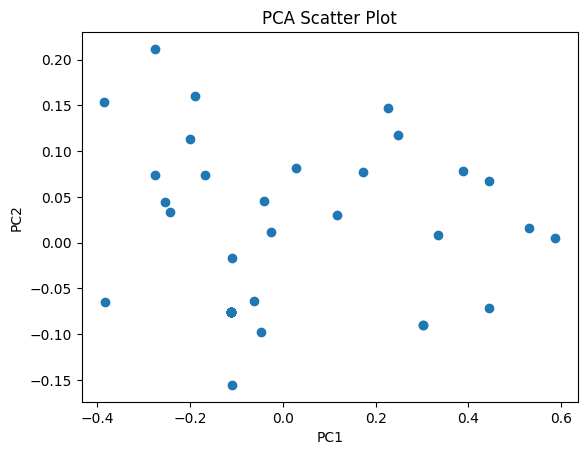

In [78]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Analisis PCA
# Misal X adalah data numerik
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_matrix)

plt.scatter(X_pca[:,0], X_pca[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()

Kode tersebut merupakan implementasi analisis komponen utama atau PCA menggunakan Python. Pada bagian awal, library PCA dari sklearn.decomposition dan matplotlib.pyplot diimpor agar dapat melakukan reduksi dimensi dan visualisasi. Selanjutnya, objek PCA dibuat dengan dua komponen utama, yang berarti data asli akan direduksi menjadi dua sumbu baru, PC1 dan PC2, yang mewakili arah dengan variansi terbesar pada data. Variabel X_matrix digunakan sebagai input untuk metode fit_transform, sehingga menghasilkan matriks baru X_pca yang merupakan representasi data dalam dimensi yang lebih rendah. Kemudian, fungsi plt.scatter digunakan untuk memplot titik-titik data pada bidang dua dimensi, di mana sumbu horizontal menunjukkan nilai PC1 dan sumbu vertikal menunjukkan nilai PC2. Label sumbu dan judul grafik diberikan dengan plt.xlabel, plt.ylabel, dan plt.title. Akhirnya, plt.show() menampilkan scatter plot tersebut. Output berupa scatter plot yang memperlihatkan sebaran data setelah direduksi menjadi dua komponen utama, sehingga pola atau cluster antar data menjadi lebih mudah diamati dibandingkan dengan melihat semua fitur asli secara bersamaan. Plot ini membantu dalam memahami hubungan antar titik data dan kemungkinan adanya kelompok yang serupa dalam dataset.
